# ESTRATEGIA VALUE

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 9 y 10__

__Gestión de Activos y Carteras__

__CUNEF__

Para esta estrategia, se utilizan tanto el valor de la empresa sobre el EBITDA como los dividendos a un año de numerosos activos que vemos en los datos importados a continuación, para obtener una valoración de los mismos.

Con este factor de riesgo queremos identificar aquellas acciones que son más baratas y aquellas que son más caras a partir de los ratios contables utilizados.

Construiremos un modelo alternative risk premium (alternative beta), neutral al mercado.

Esta estrategia realiza un ranking de todos los activos en función a las posiciones de cada uno a corto o largo plazo (la importancia de cada plazo depende del peso que le demos a cada una y será explicada más adelante). El objetivo no es solo optimizar las rentabilidades de las acciones seleccionadas, sino hacer pruebas a la hora de seleccionar una estrategia u otra. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importamos los datos que se desean analizar para nuestra cartera.

In [2]:
datos = pd.read_excel('datos.xlsx')
datos = datos.set_index('Symbol')
datos.head()

,Name,Price,Currency,FX Chang,Sector,Country,Rentab 1Y,Volat 30d,Volat 360d,EV_TO_T12M_EBITDA,EQY_DVD_YLD_12M,NET_OPERATING_ASSETS,RETURN_ON_INV_CAPITAL,EQY_BETA,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT,NEWS_SENTIMENT
Symbol,,,,,,,,,,,,,,,,,,,,
NESN SW Equity,NESTLE SA-REG,101.32,CHF,0.9402,Food,SWITZERLAND,0.018599,0.237874,0.199546,0.166487,0.026648,79763.000000,0.138397,0.812534,3.851852,27,13,1,0.0,0.382784
ROG SW Equity,ROCHE HOLDING AG-GENUSSCHEIN,332.10,CHF,0.9402,Pharmaceuticals,SWITZERLAND,0.221180,0.256552,0.224647,0.128229,0.027100,39591.000000,0.279033,1.031748,3.687500,32,16,5,0.0,0.034268
NOVN SW Equity,NOVARTIS AG-REG,81.18,CHF,0.9402,Pharmaceuticals,SWITZERLAND,-0.082919,0.259980,0.231213,0.150534,0.036339,73355.000000,0.086807,1.073373,3.827586,29,16,4,0.0,0.261707
BATS LN Equity,BRITISH AMERICAN TOBACCO PLC,3275.00,GBp,1.1150,Agriculture,BRITAIN,0.097336,0.341078,0.326400,0.110997,0.062550,106877.000000,0.051704,1.123634,4.473684,19,14,0,0.0,0.112235
FP FP Equity,TOTAL SA,34.04,EUR,1.0000,Oil&Gas,FRANCE,-0.288610,0.523668,0.397920,0.051470,0.077556,131091.815834,0.041398,1.290288,3.466667,30,10,3,0.0,0.000000


In [3]:
datos.columns

Index(['Name', 'Price', 'Currency', 'FX Chang', 'Sector', 'Country',
       'Rentab 1Y', 'Volat 30d', 'Volat 360d', 'EV_TO_T12M_EBITDA',
       'EQY_DVD_YLD_12M', 'NET_OPERATING_ASSETS', 'RETURN_ON_INV_CAPITAL',
       'EQY_BETA', 'EQY_REC_CONS', 'TOT_ANALYST_REC', 'TOT_BUY_REC',
       'TOT_SELL_REC', 'TWITTER_SENTIMENT', 'NEWS_SENTIMENT'],
      dtype='object')

Importamos también, por separado, los datos históricos de cada activo.

In [4]:
historicos = pd.read_excel('historico.xlsx')
historicos['Date'] = pd.to_datetime(historicos['Date'], format="%Y-%m-%d")
historicos = historicos.set_index('Date')
historicos.head()

,NESN SW Equity,ROG SW Equity,NOVN SW Equity,BATS LN Equity,FP FP Equity,RDSA LN Equity,SAN FP Equity,SIE GY Equity,RDSB LN Equity,BAYN GY Equity,...,AXP UN Equity,WMT UN Equity,MSFT UW Equity,MRK UN Equity,NKE UN Equity,VZ UN Equity,KO UN Equity,INTC UW Equity,CSCO UW Equity,PFE UN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-18,56.65,162.9,44.82,3191.5,37.320,2154.0,56.25,68.937,2208.0,51.695,...,58.04,62.06,31.14,38.40,27.6400,37.66,37.085,27.94,20.06,22.45
2012-04-19,57.20,164.4,45.04,3224.0,36.335,2122.5,55.78,67.697,2183.0,51.567,...,57.57,61.75,31.03,38.36,27.4025,38.15,36.910,27.69,19.92,22.32
2012-04-20,57.10,168.7,45.26,3244.0,36.450,2136.5,56.67,68.491,2202.5,52.875,...,57.45,62.45,32.42,38.73,27.6925,38.73,37.065,27.60,19.91,22.56
2012-04-23,55.50,166.2,45.00,3213.5,35.560,2110.0,55.57,66.766,2179.5,50.553,...,57.32,59.54,32.12,38.27,27.4375,38.57,36.845,27.45,19.68,22.38
2012-04-24,55.50,166.5,44.33,3157.0,35.910,2130.0,56.59,67.648,2200.5,51.262,...,57.63,57.77,31.92,38.27,26.6875,39.50,37.060,27.31,19.42,22.63


In [5]:
historicos.columns

Index(['NESN SW Equity', 'ROG SW Equity', 'NOVN SW Equity', 'BATS LN Equity',
       'FP FP Equity', 'RDSA LN Equity', 'SAN FP Equity', 'SIE GY Equity',
       'RDSB LN Equity', 'BAYN GY Equity',
       ...
       'AXP UN Equity', 'WMT UN Equity', 'MSFT UW Equity', 'MRK UN Equity',
       'NKE UN Equity', 'VZ UN Equity', 'KO UN Equity', 'INTC UW Equity',
       'CSCO UW Equity', 'PFE UN Equity'],
      dtype='object', length=176)

Importamos también los datos del índice MXWD, que incluye los mercados emergentes y desarrollados, para comparar con este el comportamiento de la estrategia.

In [6]:
index = pd.read_excel('MXWOindex.xlsx')
index['Date'] = pd.to_datetime(index['Date'], format="%Y-%m-%d")
index = index.set_index('Date')
index.head()

,MXWO Index
Date,
2012-04-18,1283.87
2012-04-19,1277.72
2012-04-20,1281.71
2012-04-23,1264.21
2012-04-24,1271.80


Seleccionamos los ratios contables que se van a utilizar (EBITDA y dividendos a un año) para crear el ranking y los pesos ya que, en esta estrategia, son los únicos que se deben aplicar. Para ello, creamos un nuevo dataframe que será utilizado de ahora en adelante como los datos originales.

In [7]:
cuenta = datos.Name.count()
rentabilidades = datos[['EV_TO_T12M_EBITDA', 'EQY_DVD_YLD_12M']]
rentabilidades.index = datos.index
rentabilidades.head()

,EV_TO_T12M_EBITDA,EQY_DVD_YLD_12M
Symbol,,
NESN SW Equity,0.166487,0.026648
ROG SW Equity,0.128229,0.027100
NOVN SW Equity,0.150534,0.036339
BATS LN Equity,0.110997,0.062550
FP FP Equity,0.051470,0.077556


In [8]:
ranking = rentabilidades.rank(ascending=False) 
ranking.head()

,EV_TO_T12M_EBITDA,EQY_DVD_YLD_12M
Symbol,,
NESN SW Equity,26.0,102.0
ROG SW Equity,55.0,99.0
NOVN SW Equity,35.0,70.0
BATS LN Equity,78.0,28.0
FP FP Equity,161.0,16.0


Seleccionamos unos pesos para el largo y corto plazo y se lo aplicamos a cada variable en función del ranking anterior.

In [9]:
corto = 20.0
largo = 20.0
peso_corto = -2
peso_largo = 2

In [10]:
lista = []
for i in ranking['EV_TO_T12M_EBITDA']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista.extend(m)
    weights = pd.DataFrame(lista, columns = ['EV_TO_T12M_EBITDA'])

In [11]:
lista2 = []
for i in ranking['EQY_DVD_YLD_12M']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista2.extend(m)
    weights2 = pd.DataFrame(lista2, columns = ['EQY_DVD_YLD_12M'])

Juntando los pesos de cada variable, obtenemos los pesos finales y añadimos una columna con el peso total de cada activo en base a su horizonte temporal.

In [12]:
weights['EQY_DVD_YLD_12M'] = weights2['EQY_DVD_YLD_12M']
weights['Symbol'] = datos.index
weights = weights.set_index('Symbol')
weights.head()

,EV_TO_T12M_EBITDA,EQY_DVD_YLD_12M
Symbol,,
NESN SW Equity,0.0,0.0
ROG SW Equity,0.0,0.0
NOVN SW Equity,0.0,0.0
BATS LN Equity,0.0,0.0
FP FP Equity,-0.1,0.1


Se da más importancia al EBITDA tras comprobar que así se obtienen mejores resultados. Esto puede deberse a que permite analizar objetivamente la capacidad productiva de una empresa y por lo tanto una información más objetiva de la valoración y calidad de un activo ya que excluye la aleatoriedad en la dotación de provisiones y anula el impacto de los impuestos en los resultados.

In [13]:
imp = [0.7, 0.3]
sum(imp)

1.0

In [14]:
weights['Total'] = (imp*weights).sum(axis=1)
weights.head()

,EV_TO_T12M_EBITDA,EQY_DVD_YLD_12M,Total
Symbol,,,
NESN SW Equity,0.0,0.0,0.00
ROG SW Equity,0.0,0.0,0.00
NOVN SW Equity,0.0,0.0,0.00
BATS LN Equity,0.0,0.0,0.00
FP FP Equity,-0.1,0.1,-0.04


Calculamos a continuación los resultados preliminares, teniendo en cuenta las rentabilidades originales de cada activo y el peso otorgado en cada plazo. 

In [15]:
resultados_peliminares = (weights * rentabilidades).sum()
resultados_peliminares

EQY_DVD_YLD_12M      0.191516
EV_TO_T12M_EBITDA    0.419721
Total                0.000000
dtype: float64

## Datos finales de la estrategia

Para la parte final de este estudio, debemos tener en cuenta los datos históricos de cada activo importados al principio del análisis. Estimamos el cambio de porcentaje de cada activo para obtener las renntabilidades diarias de cada una y así obtener los datos finales con los que generaremos la cartera óptima.

In [16]:
df = historicos.pct_change().dropna()
df.head()

,NESN SW Equity,ROG SW Equity,NOVN SW Equity,BATS LN Equity,FP FP Equity,RDSA LN Equity,SAN FP Equity,SIE GY Equity,RDSB LN Equity,BAYN GY Equity,...,AXP UN Equity,WMT UN Equity,MSFT UW Equity,MRK UN Equity,NKE UN Equity,VZ UN Equity,KO UN Equity,INTC UW Equity,CSCO UW Equity,PFE UN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-19,0.009709,0.009208,0.004909,0.010183,-0.026393,-0.014624,-0.008356,-0.017987,-0.011322,-0.002476,...,-0.008098,-0.004995,-0.003532,-0.001042,-0.008593,0.013011,-0.004719,-0.008948,-0.006979,-0.005791
2012-04-20,-0.001748,0.026156,0.004885,0.006203,0.003165,0.006596,0.015956,0.011729,0.008933,0.025365,...,-0.002084,0.011336,0.044795,0.009645,0.010583,0.015203,0.004199,-0.003250,-0.000502,0.010753
2012-04-23,-0.028021,-0.014819,-0.005745,-0.009402,-0.024417,-0.012403,-0.019411,-0.025186,-0.010443,-0.043915,...,-0.002263,-0.046597,-0.009254,-0.011877,-0.009208,-0.004131,-0.005936,-0.005435,-0.011552,-0.007979
2012-04-24,0.000000,0.001805,-0.014889,-0.017582,0.009843,0.009479,0.018355,0.013210,0.009635,0.014025,...,0.005408,-0.029728,-0.006227,0.000000,-0.027335,0.024112,0.005835,-0.005100,-0.013211,0.011171
2012-04-25,0.002703,0.006006,-0.003835,-0.002534,0.008772,-0.000939,0.006362,0.010318,-0.005226,0.021497,...,0.022211,-0.007097,0.008772,0.004181,0.021358,-0.000506,0.010928,0.020139,0.003605,0.011047


In [17]:
def ratios(rentabilidades, weights):
    '''
        returns = dataframe que contiene las rentabilidades diarias de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(rentabilidades)):
        
        value = resultados[i-1] * (1 + (rentabilidades.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['Value'])  
    final.set_index(rentabilidades.index, inplace=True)
        
    return final

En el dataframe a continuación, podemos observar el resultado de esta estrategia y la graficamos a continuación. Gráficamente, y en comparación con el índice MXWD, se observa que se ha conseguido obtener una estrategia neutral al mercado.

In [18]:
final = ratios(df, weights)
final

,Value
Date,
2012-04-19,100.000000
2012-04-20,99.879487
2012-04-23,101.469698
2012-04-24,100.878603
2012-04-25,99.577627
...,...
2020-05-12,170.393880
2020-05-13,174.602926
2020-05-14,175.937976


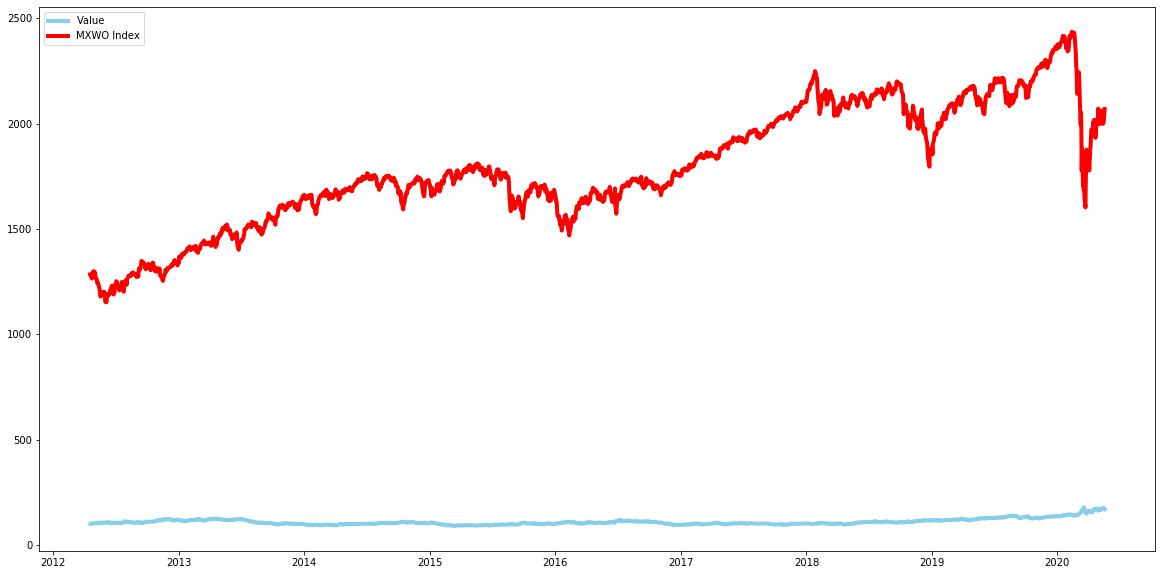

In [19]:
plt.figure(figsize=(20,10))
plt.plot(final.index, final['Value'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label ='Value')
plt.plot(index.index, index['MXWO Index'], marker='', markerfacecolor='red', markersize=12, color='red', 
         linewidth=4, label ='MXWO Index')
plt.legend()

Podemos concluir que la selección de pesos para los datos en cuestión es correcta (al aplicar el inverso, es decir, mayor peso al corto que al largo, los resultados eran peores, había más volatilidad). Esto se debe a que se cree que a futuro lo van a hacer mejor que aquellas acciones que tienen ahora una valoración más alta.

In [20]:
final.to_csv('Estrategia_Value_final.csv')